In [57]:
!pip install -q pandas
!pip install -q numpy
!pip install -q sklearn

In [61]:
!ls "/storage/log-analysis/"
import os
os.chdir("/storage/log-analysis/")

__pycache__  log_model-testing.h5  webLog.csv


In [62]:
#!/usr/bin/env python
"""
This file is for training on the webLog data.
"""

from __future__ import print_function
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from numpy import array
import pandas as pd

# Preprocess webLog.csv and get rid of the Time column.
log = '/storage/log-analysis/webLog.csv'
log = pd.read_csv(log)
log = log.drop(['Time'], axis=1)

# Data pre-processing.
encodedlog = log.apply(LabelEncoder().fit_transform)
#print(encodedlog)
scaler = StandardScaler().fit(encodedlog)
encodedlog_scaled = scaler.transform(encodedlog)
#print(encodedlog_scaled)

onehot = OneHotEncoder()
onehot_output = onehot.fit_transform(encodedlog)

# Create model.
dbscan = DBSCAN(min_samples = 5)
#dbscan = DBSCAN()

# Train model.
dbsc = dbscan.fit(onehot_output)
labels = dbsc.labels_

# Number of clusters in labels and noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Identify outliers.
outliers = np.where(labels == -1)
print(log.iloc[outliers])

Estimated number of clusters: 301
Estimated number of noise points: 771
              IP                                            Request  Response
0       10.4.5.2                           GET /madeup.php HTTP/1.1       200
6     10.130.2.1                GET /profile.php?user=bala HTTP/1.1       200
9     10.131.2.1                   GET /edit.php?name=bala HTTP/1.1       200
40    10.129.2.1                    GET /details.php?id=44 HTTP/1.1       302
96    10.131.2.1  GET /fonts/fontawesome-webfont.woff2?v=4.6.3 H...       304
163   10.131.2.1        GET /showcode.php?id=281&nm=shawon HTTP/1.1       200
177   10.131.2.1                            GET /index.php HTTP/1.1       200
196   10.131.2.1  GET /contestproblem.php?name=Toph%20Contest%20...       200
199   10.131.2.1  GET /contestproblem.php?name=ncpc%202016 HTTP/1.1       200
200   10.131.2.1                     GET /details.php?id=3 HTTP/1.1       200
201   10.131.2.1  GET /contestproblem.php?name=ncpc%202016 HTTP/1.1   

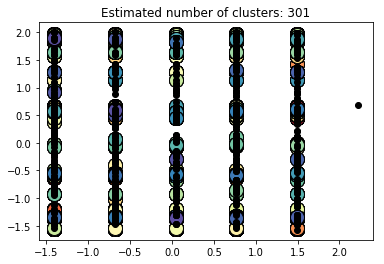

In [63]:
# Plot result
import matplotlib.pyplot as plt

core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = encodedlog_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = encodedlog_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()